In [ ]:
'''It creates a synthetic classification dataset — like a “fake” dataset with features (X) and labels (y).

Very useful for testing machine learning models or experimenting with concepts like imbalanced datasets.'''

from sklearn.datasets import make_classification   #It’s a data generator in scikit-learn.
import pandas as pd

x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                        weights=[0.90],random_state=12)#locks the randomness so you get the same output every time you run the code.

#generates a dataset with 1000 samples, 2 features, and a class imbalance (90% of one class, 10% of the other). means 90% of samples will belong to class 0.
df=pd.DataFrame(x,columns=['f1','f2'])

In [3]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

df=pd.concat([df1,df2],axis=1)

In [4]:
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

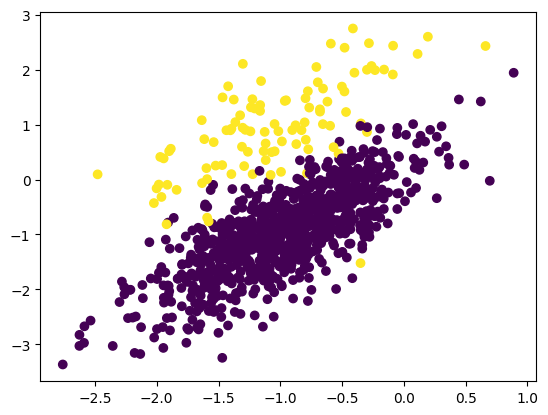

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['f1'],df['f2'],c=df['target'])

In [7]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=12)
x,y=smote.fit_resample(df[['f1','f2']],df['target'])


In [8]:
x.shape,y.shape

((1800, 2), (1800,))

In [9]:
len(y==0),len(y==1)

(1800, 1800)

In [10]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

df=pd.concat([df1,df2],axis=1)
df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.468601,0.847261,1
1796,-1.920408,-0.124035,1
1797,-1.787328,0.624117,1
1798,0.065684,2.238479,1


Text(0.5, 1.0, 'SMOTE Resampled Data')

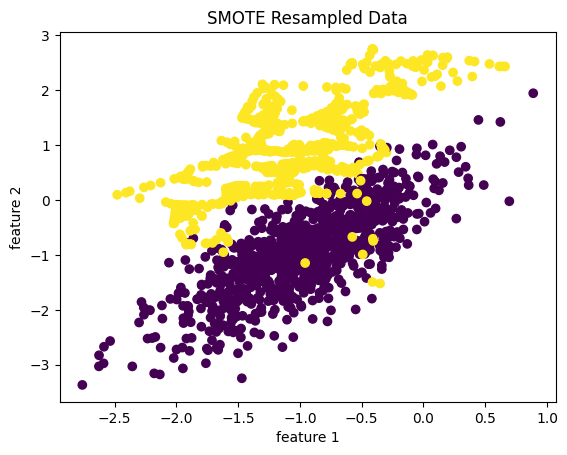

In [11]:
plt.scatter(df['f1'],df['f2'],c=df['target'])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('SMOTE Resampled Data')

In [15]:
#example 2
from sklearn.datasets import make_classification
import pandas as pd

x,y=make_classification(n_samples=2000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                        weights=[0.90],random_state=12)

df1=pd.DataFrame(x,columns=['f11','f22'])
df2=pd.DataFrame(y,columns=['target'])

df=pd.concat([df1,df2],axis=1)
df.head()

,f11,f22,target
0,-1.649121,-1.646943,0
1,-0.798299,0.131330,0
2,-1.182423,0.135927,0
3,-1.953266,-1.444338,0
4,-0.758464,-1.824810,0


Text(0.5, 1.0, 'original data')

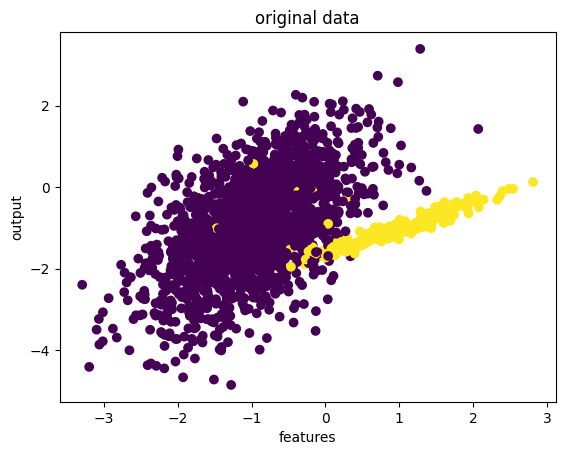

In [16]:
plt.scatter(df['f11'],df['f22'],c=df['target'])
plt.xlabel('features')
plt.ylabel('output')
plt.title('original data')

In [17]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=12)
x,y=smote.fit_resample(df[['f11','f22']],df['target'])
x.shape,y.shape

((3584, 2), (3584,))

In [18]:
len(y==0),len(y==1)

(3584, 3584)

In [20]:
#concatenate upsampled minority class with majority class
df1=pd.DataFrame(x,columns=['f11','f22'])
df2=pd.DataFrame(y,columns=['target'])

df=pd.concat([df1,df2],axis=1)
df

,f11,f22,target
0,-1.649121,-1.646943,0
1,-0.798299,0.131330,0
2,-1.182423,0.135927,0
3,-1.953266,-1.444338,0
4,-0.758464,-1.824810,0
...,...,...,...
3579,1.549739,-0.615095,1
3580,0.606158,-1.185958,1
3581,0.633518,-1.107027,1
3582,0.028736,-1.515395,1


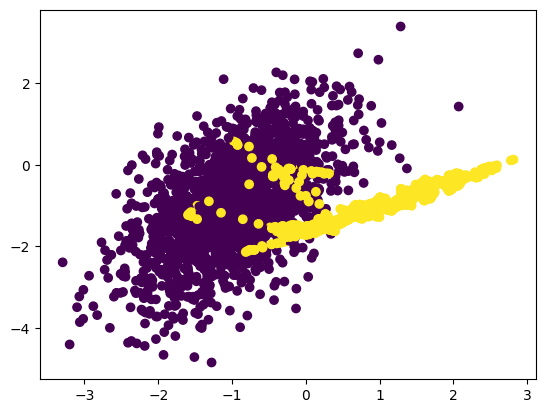

In [21]:
plt.scatter(df['f11'],df['f22'],c=df['target'])